In [30]:
%pip install numpy
%pip install matplotlib
%pip install scipy

import IPython.display as ipyd
ipyd.clear_output()

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq, irfft

def gen(freq, rate, dur):
  x = np.linspace(0, dur, rate * dur, endpoint=False)
  frequencies = x * freq
  y = np.sin(2 * np.pi * frequencies)
  return x, y

### Исходный сигнал

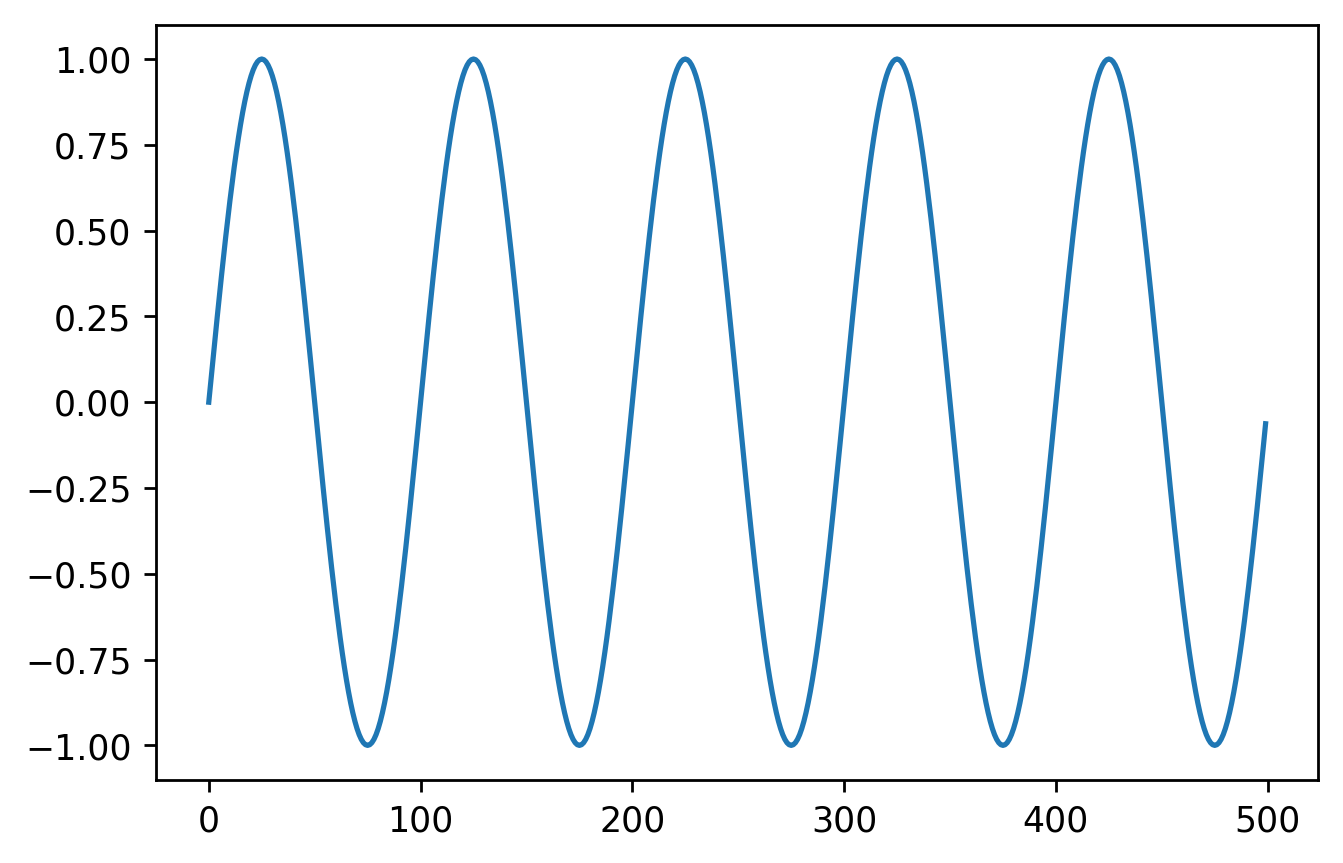

In [21]:
rate = 50000
duration = 5
frequency = 500
sample = 500


_, initial = gen(frequency, rate, duration)

plt.figure(dpi=250)
plt.plot(initial[:sample])
plt.show()

### Спектр

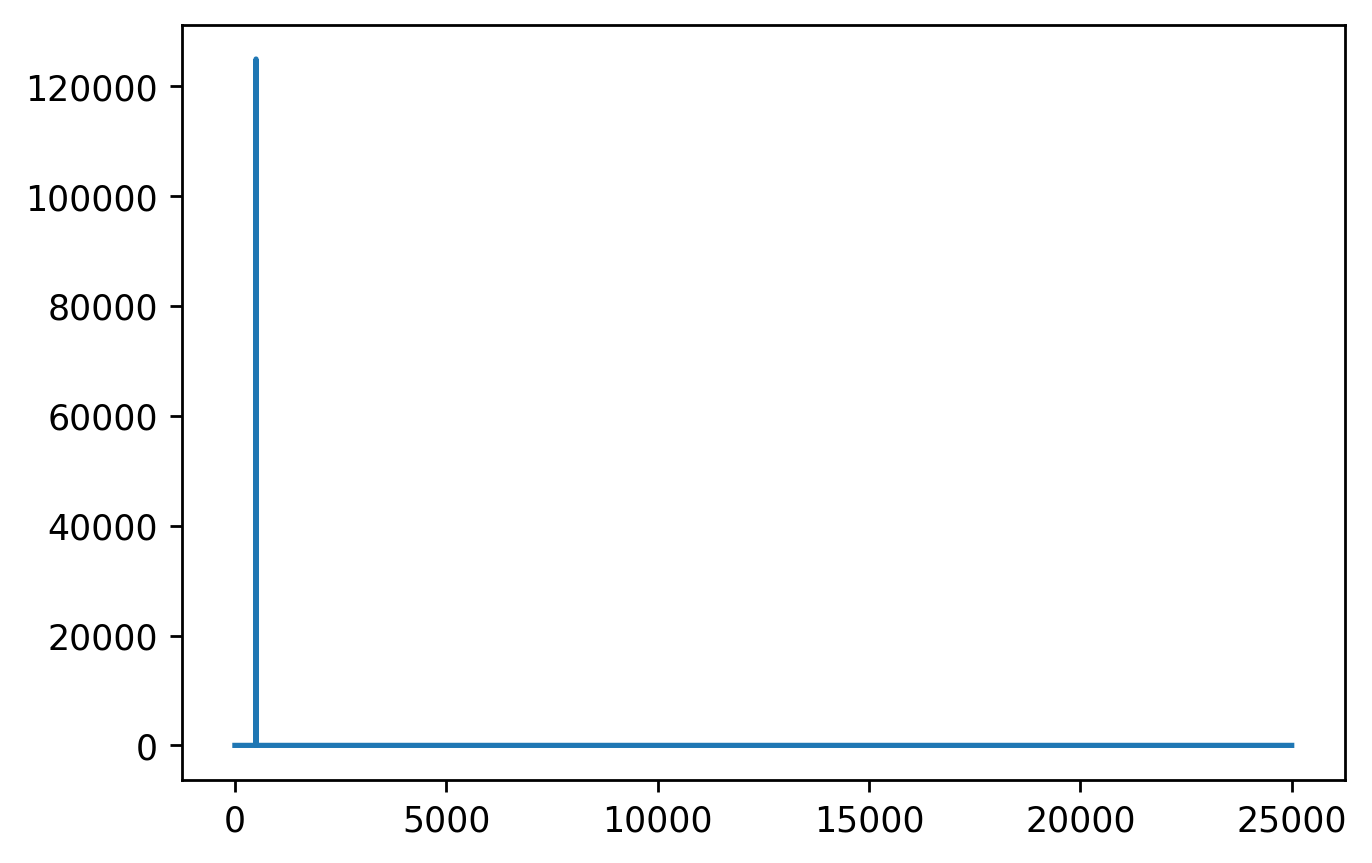

In [24]:
def spectre(wave):
  x = rfftfreq(rate * duration, 1 / rate)
  y = rfft(wave)
  return x, y

x_init_fourier, y_init_fourier = spectre(initial)
plt.figure(dpi=250)
plt.plot(x_init_fourier, np.abs(y_init_fourier))
plt.show()

### Шум

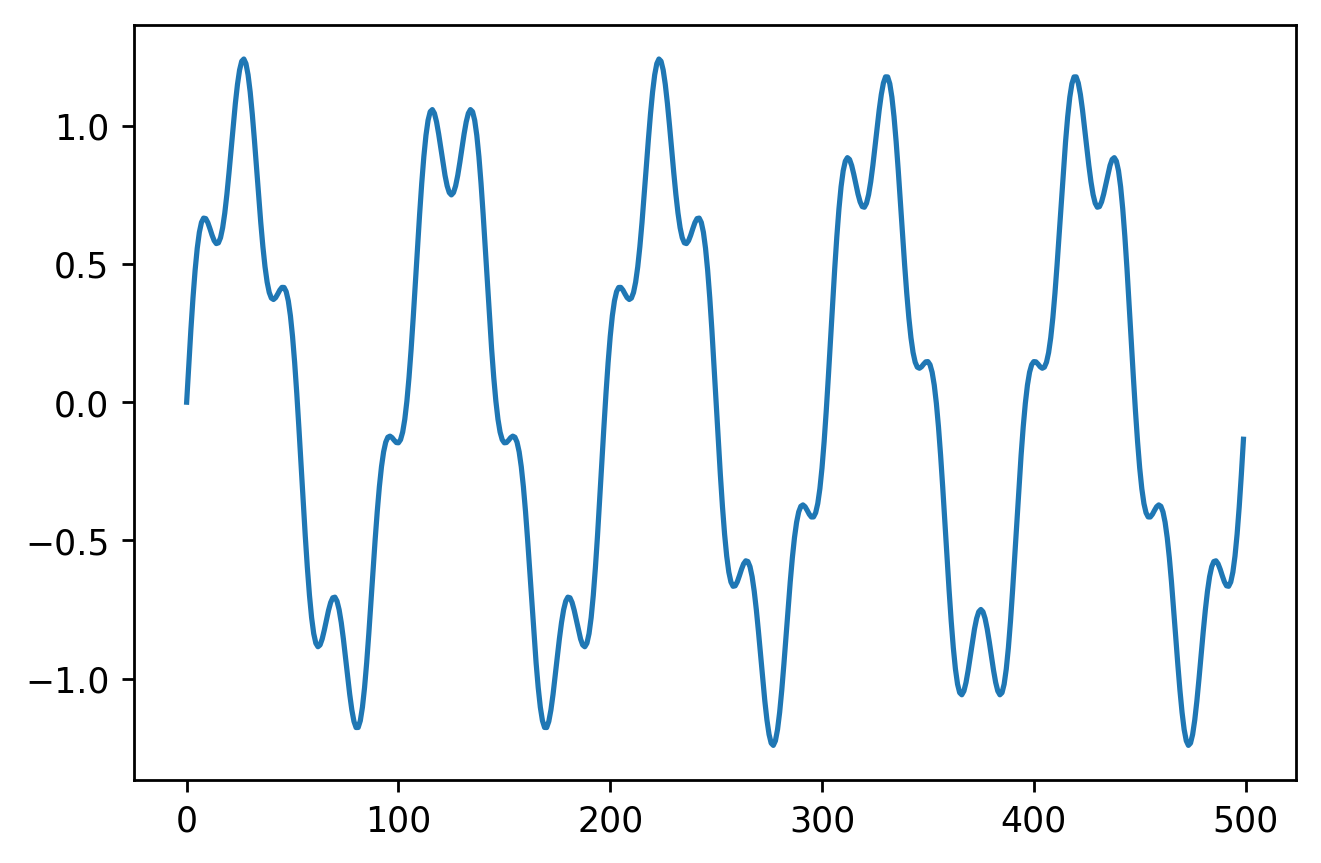

In [17]:
noise_frequency = 2300

_, noise = gen(noise_frequency, rate, duration)
noise = noise * 0.25
initial_noisy = initial + noise

plt.figure(dpi=250)
plt.plot(initial_noisy[:sample])
plt.show()

### Спектр шумного сигнала

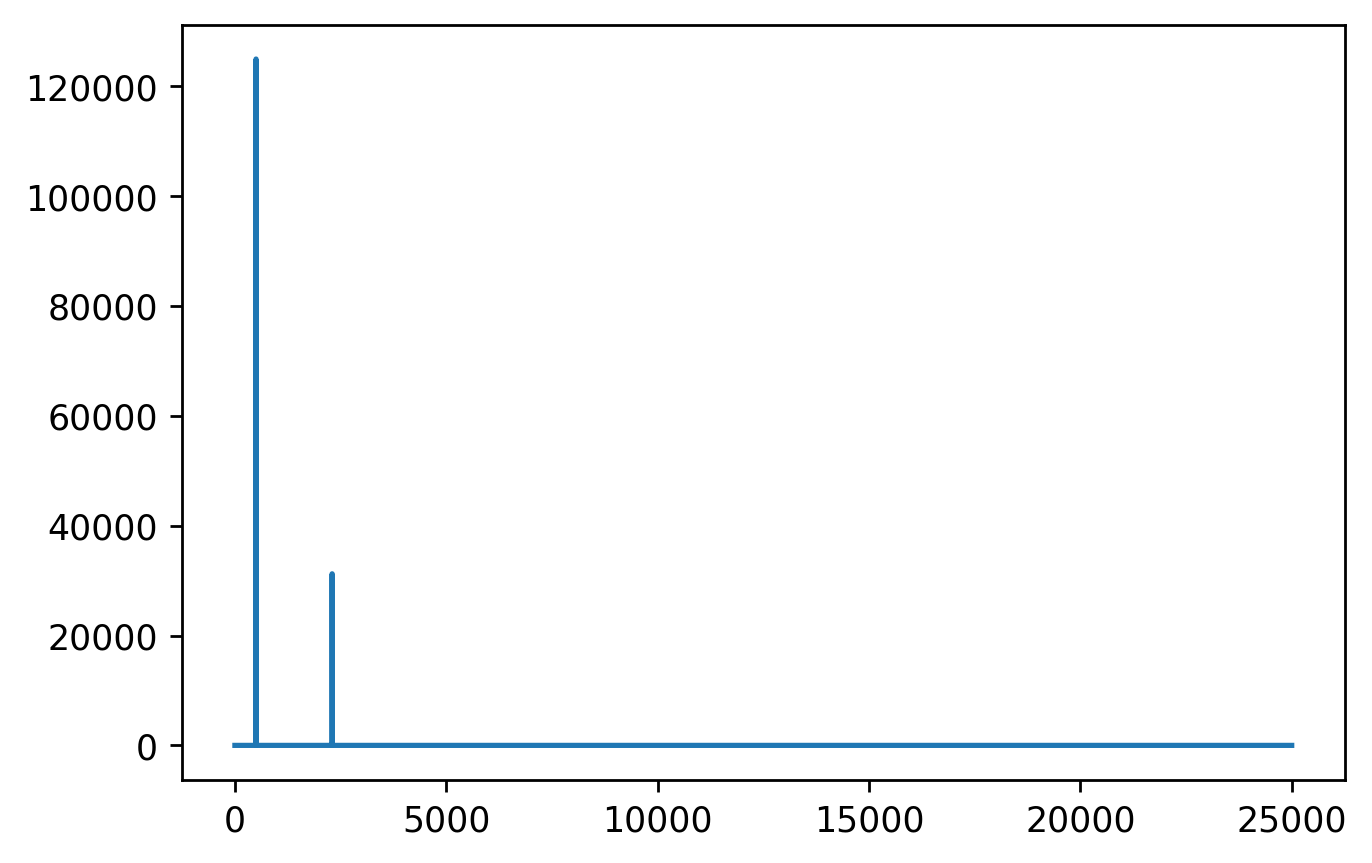

In [27]:
x_noisy_fourier, y_noisy_fourier = spectre(initial_noisy)
plt.figure(dpi=250)
plt.plot(x_noisy_fourier, np.abs(y_noisy_fourier))
plt.show()

### Фильтрация

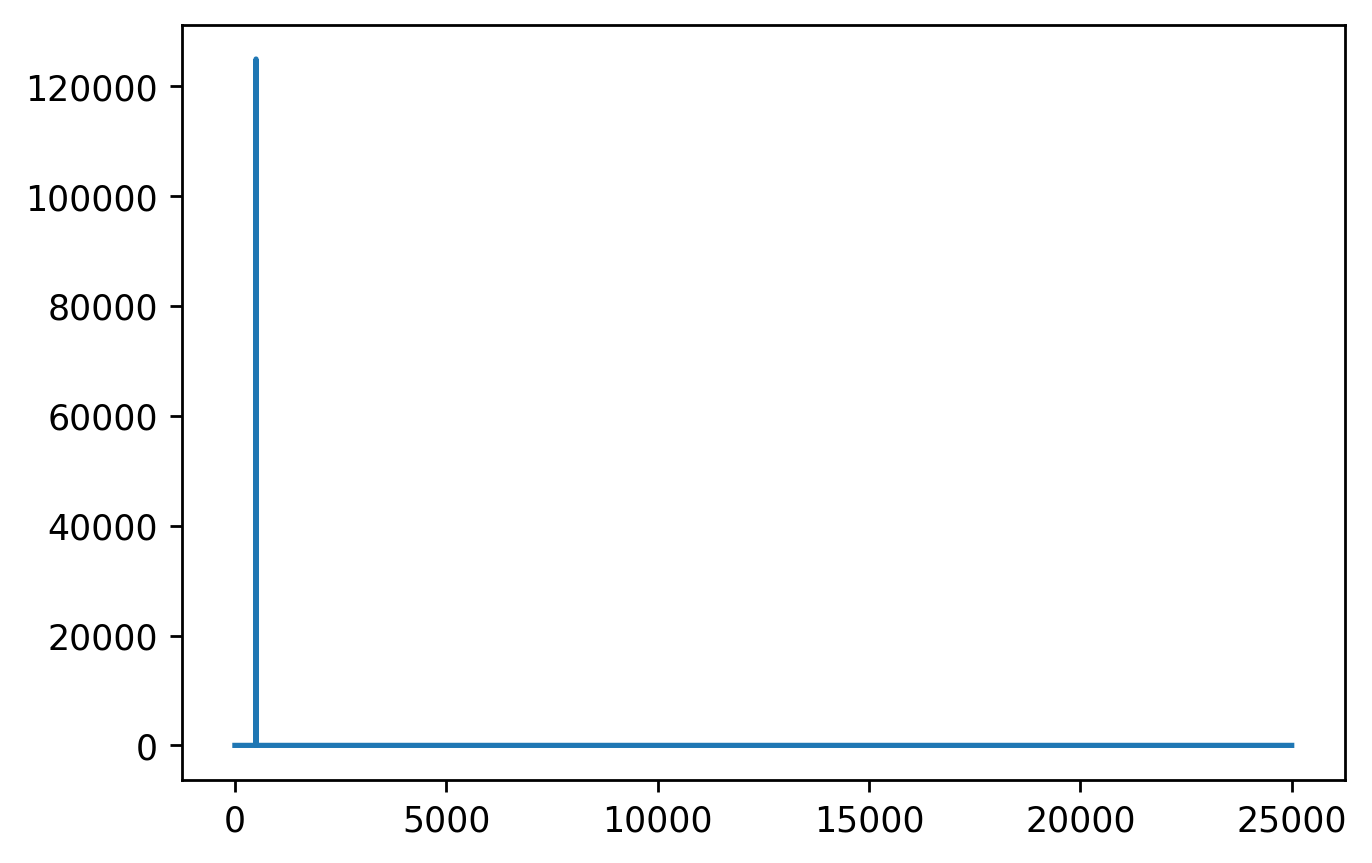

In [29]:
points_per_freq = 2*len(x_noisy_fourier) / rate

noisy_ind = int(points_per_freq * noise_frequency)
margin = 5
y_noisy_fourier[noisy_ind - margin:noisy_ind + margin] = 0

plt.figure(dpi=250)
plt.plot(x_noisy_fourier, np.abs(y_noisy_fourier))
plt.show()

# Обратное преобразование

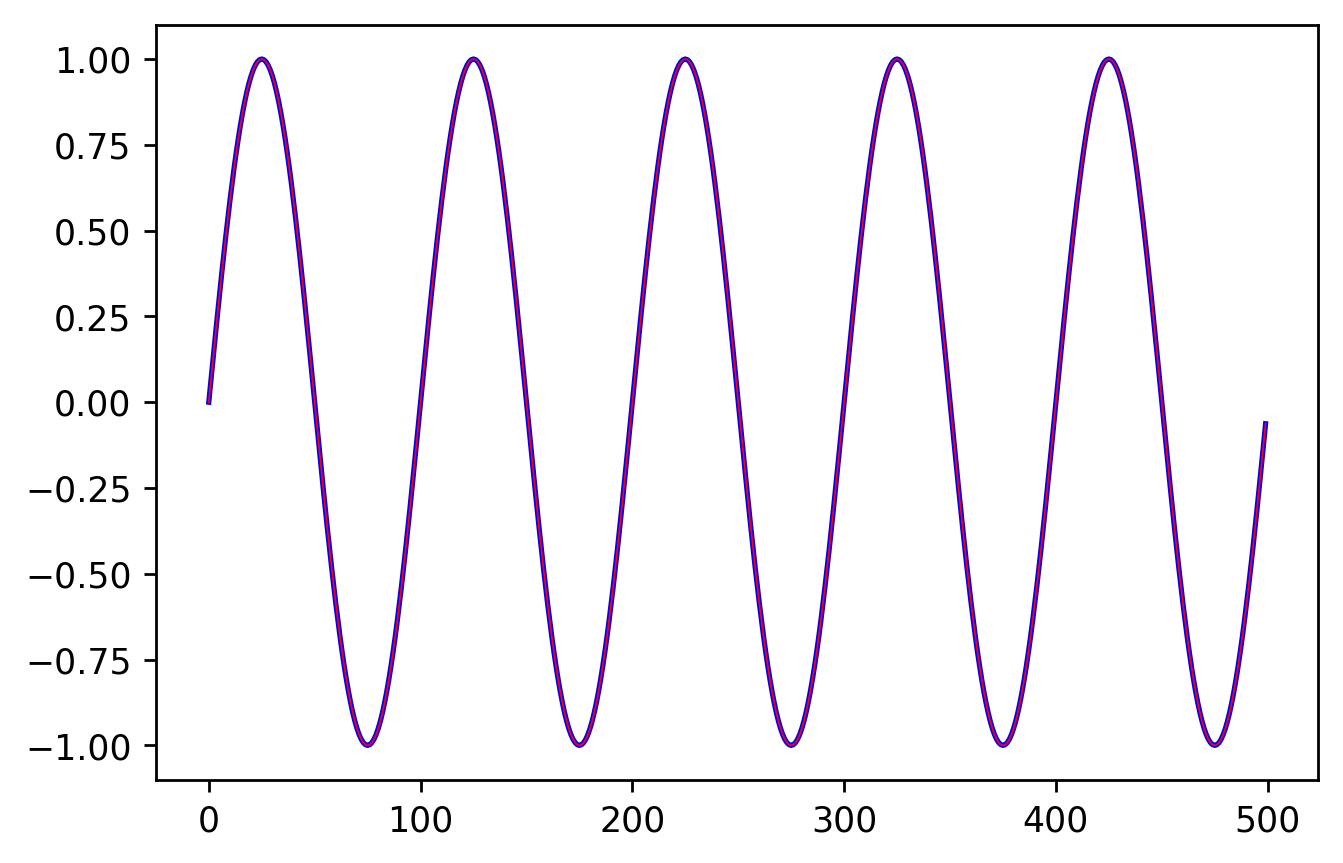

In [44]:
res = irfft(y_noisy_fourier)

plt.figure(dpi=250)
plt.plot(res[:sample],     color="blue")
plt.plot(initial[:sample], color="red", linewidth=0.5)
plt.show()

# То же самое, но с тройкой

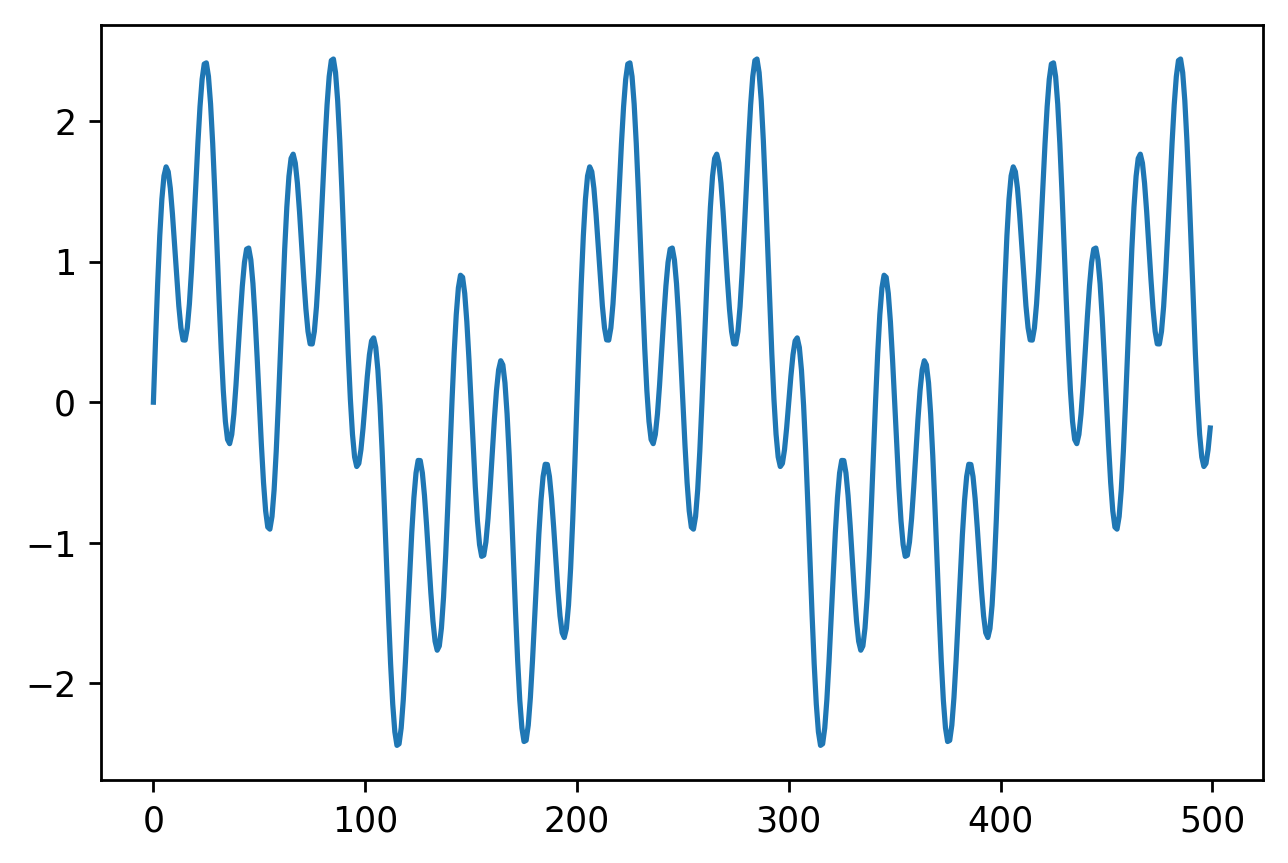

In [53]:
_, i1 = gen(250, rate, duration)
_, i2 = gen(750, rate, duration)
_, i3 = gen(2500, rate, duration)
initial3 = i1 + i2 + i3

plt.figure(dpi=250)
plt.plot(initial3[:sample])
plt.show()

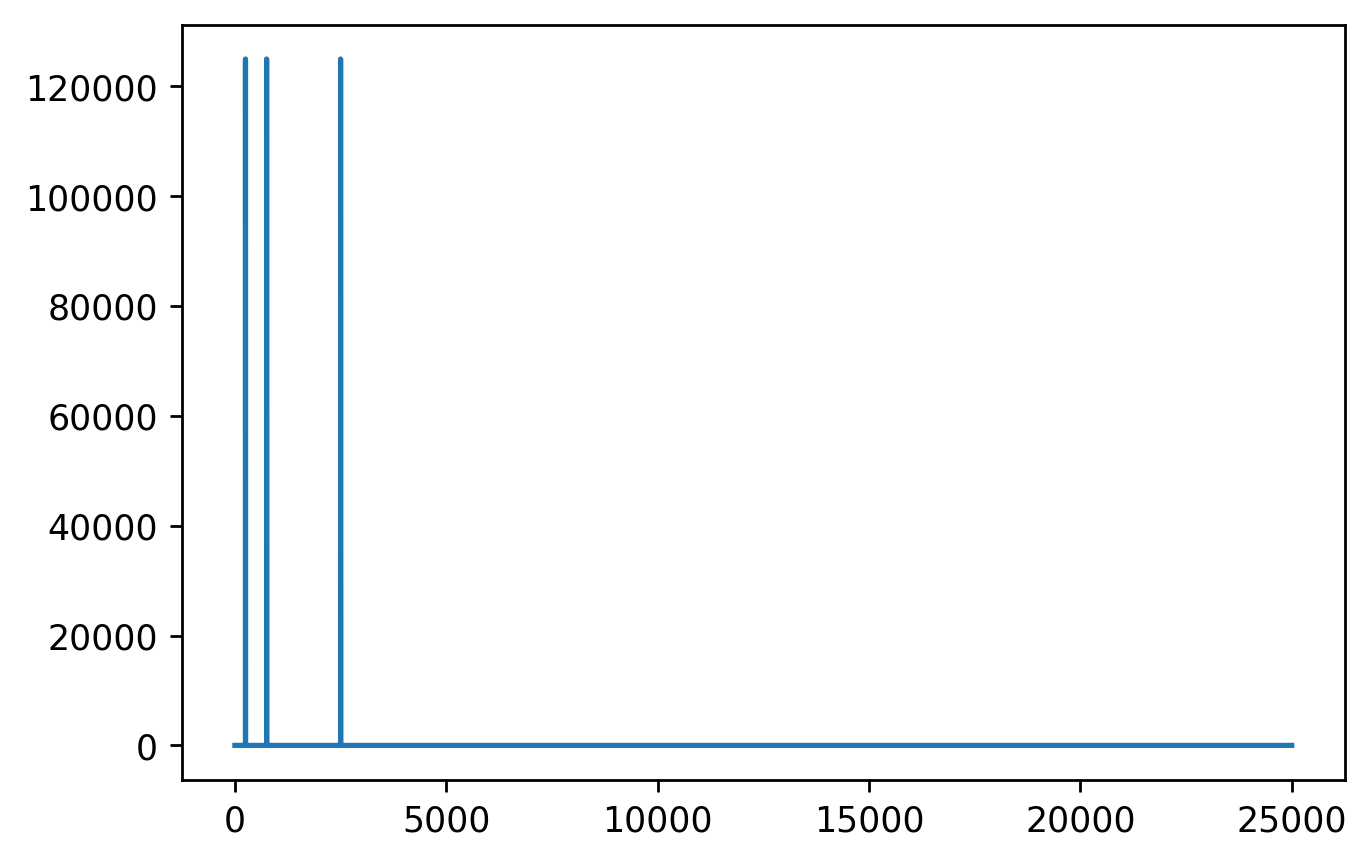

In [54]:
x_init3_fourier, y_init3_fourier = spectre(initial3)
plt.figure(dpi=250)
plt.plot(x_init3_fourier, np.abs(y_init3_fourier))
plt.show()

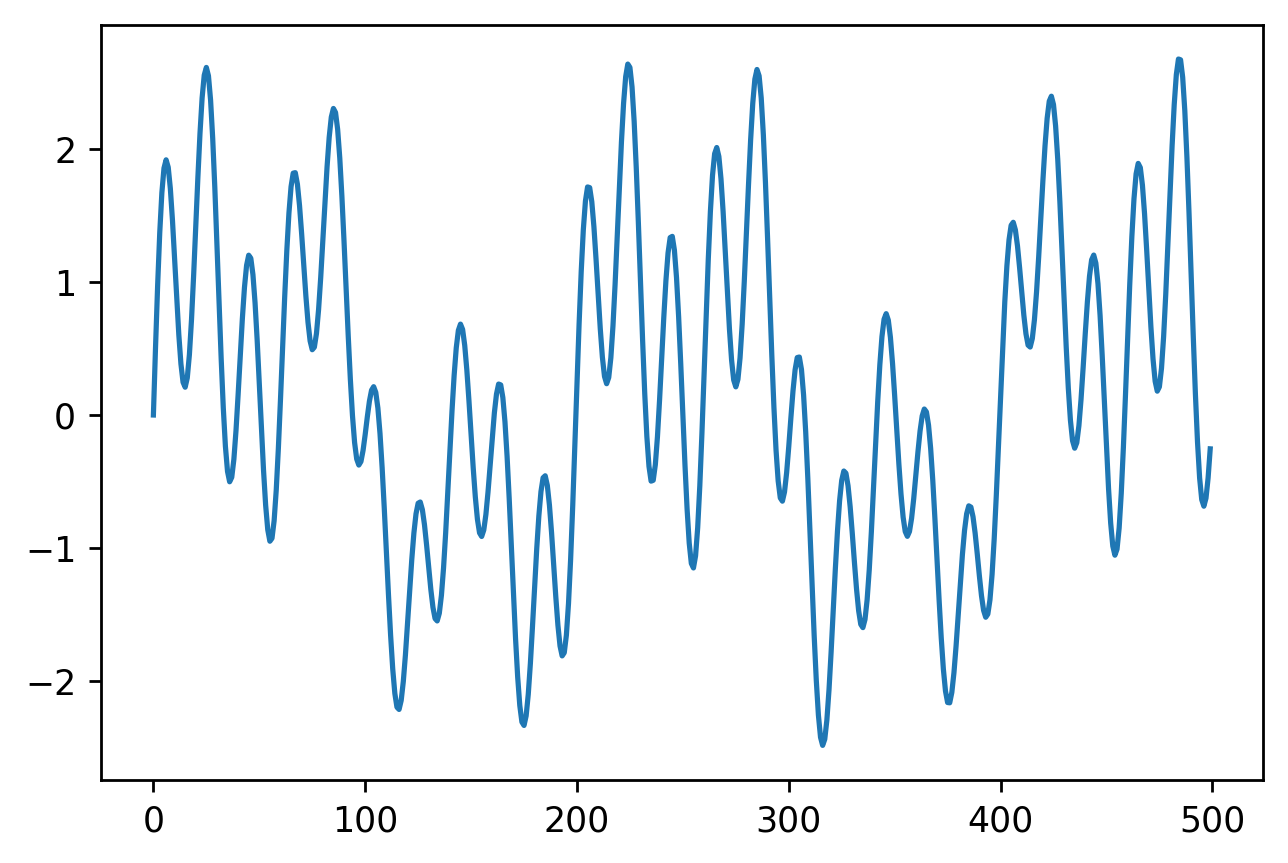

In [57]:
noise3_frequency = 2300

_, noise3 = gen(noise3_frequency, rate, duration)
noise3 = noise3 * 0.25
initial3_noisy = initial3 + noise3

plt.figure(dpi=250)
plt.plot(initial3_noisy[:sample])
plt.show()

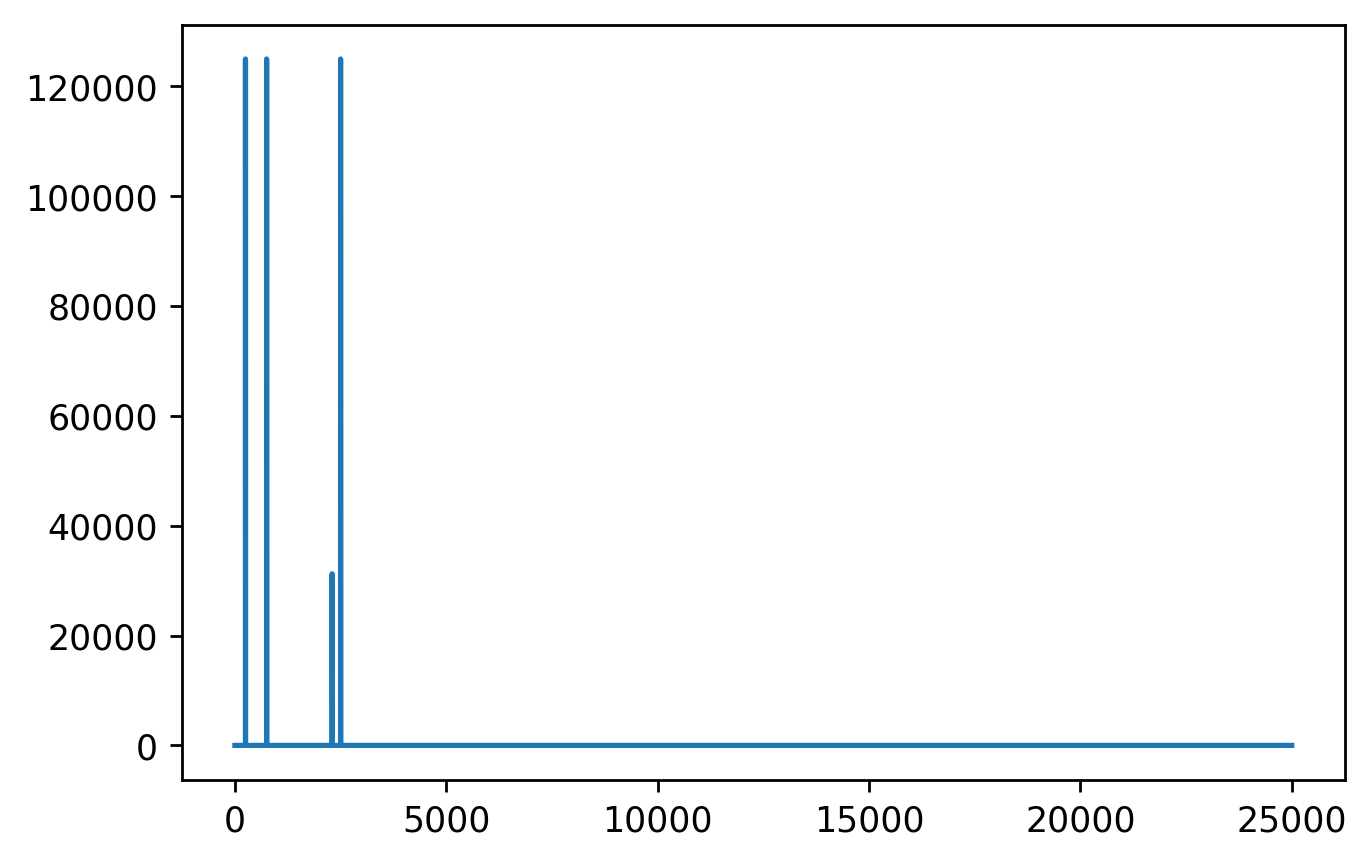

In [58]:
x_noisy3_fourier, y_noisy3_fourier = spectre(initial3_noisy)
plt.figure(dpi=250)
plt.plot(x_noisy3_fourier, np.abs(y_noisy3_fourier))
plt.show()

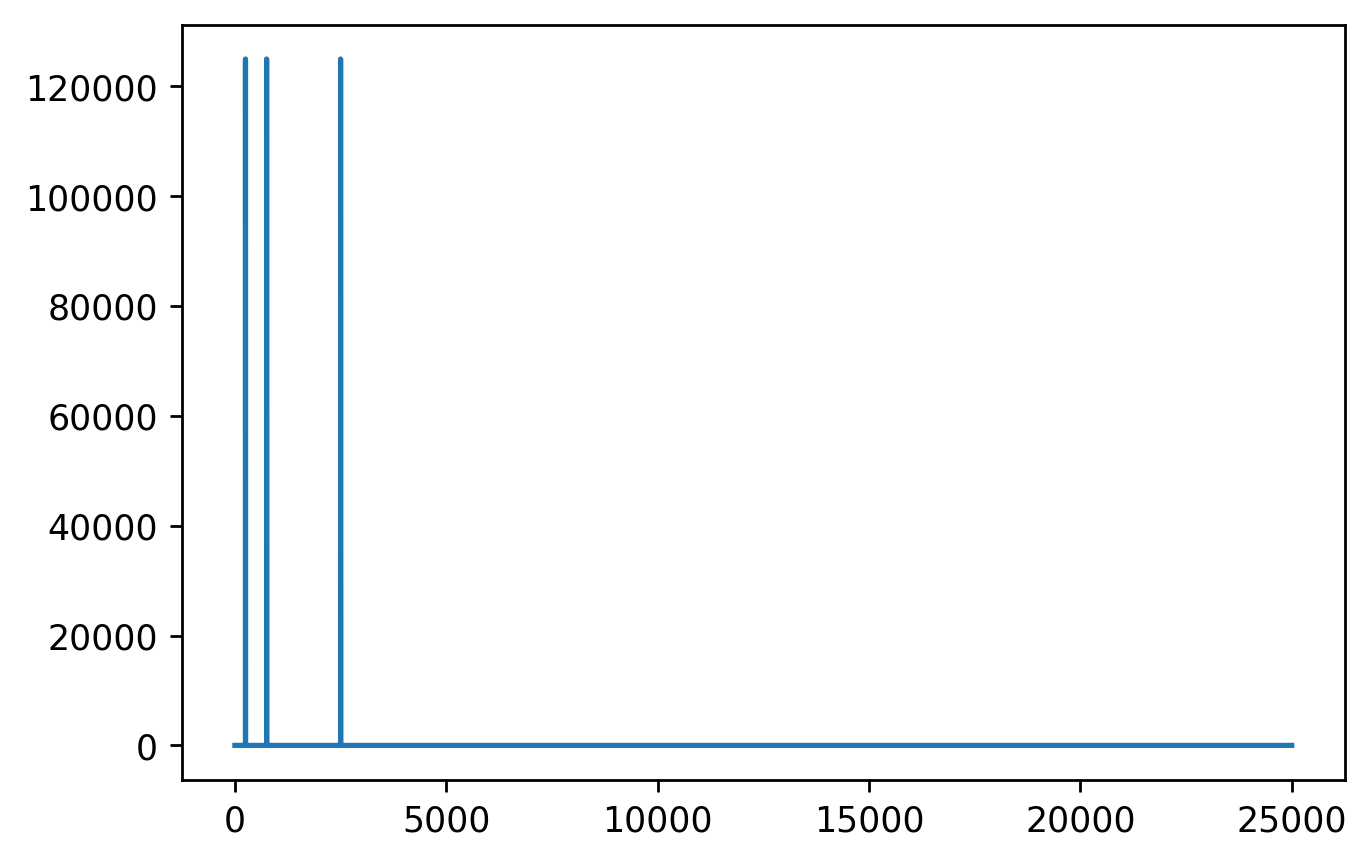

In [60]:
points_per_freq = 2*len(x_noisy3_fourier) / rate

noisy3_ind = int(points_per_freq * noise3_frequency)
margin3 = 5
y_noisy3_fourier[noisy3_ind - margin : noisy3_ind + margin] = 0

plt.figure(dpi=250)
plt.plot(x_noisy3_fourier, np.abs(y_noisy3_fourier))
plt.show()

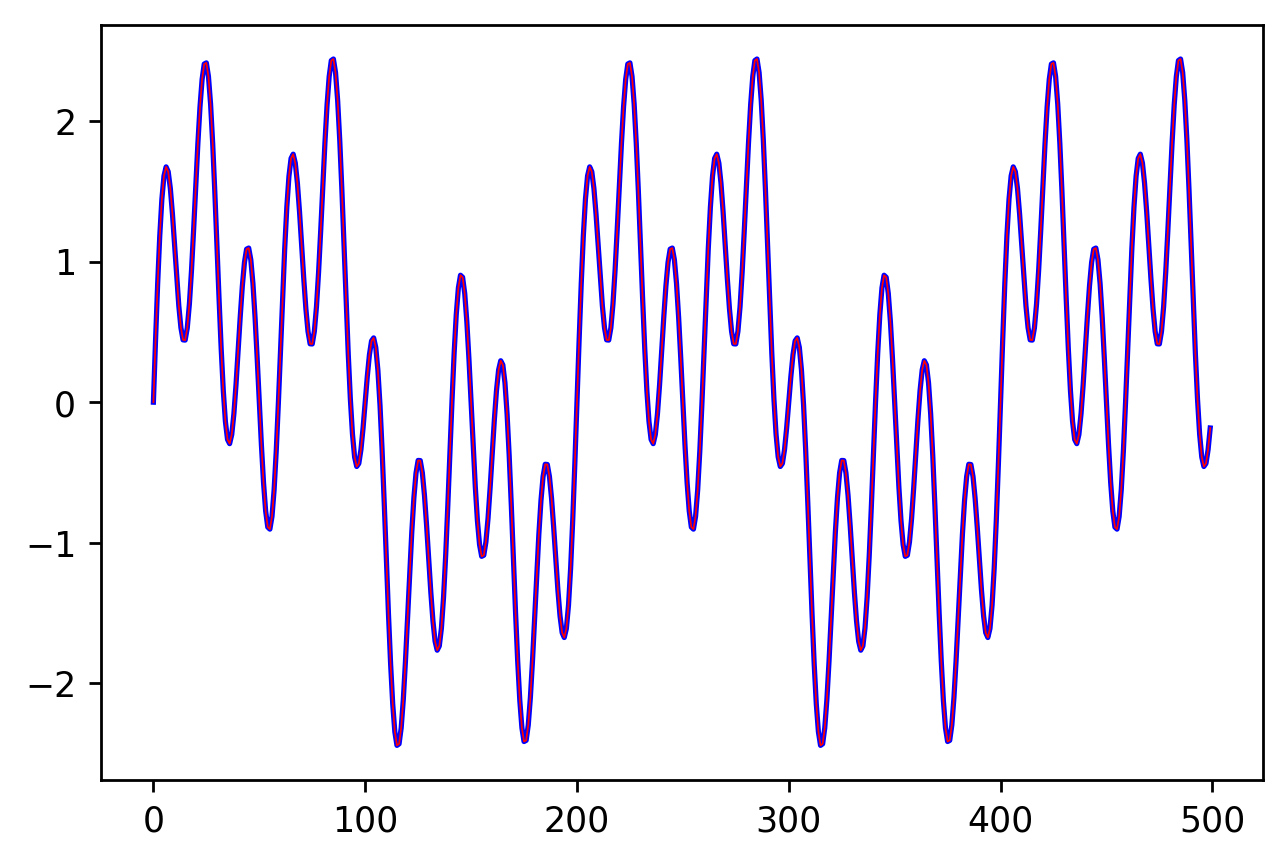

In [62]:
res3 = irfft(y_noisy3_fourier)

plt.figure(dpi=250)
plt.plot(res3[:sample],     color="blue")
plt.plot(initial3[:sample], color="red", linewidth=0.5)
plt.show()